#### Importing required libraries & Loading Data

In [21]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### **Task 1: How is age related to medical costs?**

Task 1: Age vs. Medical Costs
Correlation between age and medical costs: 0.30


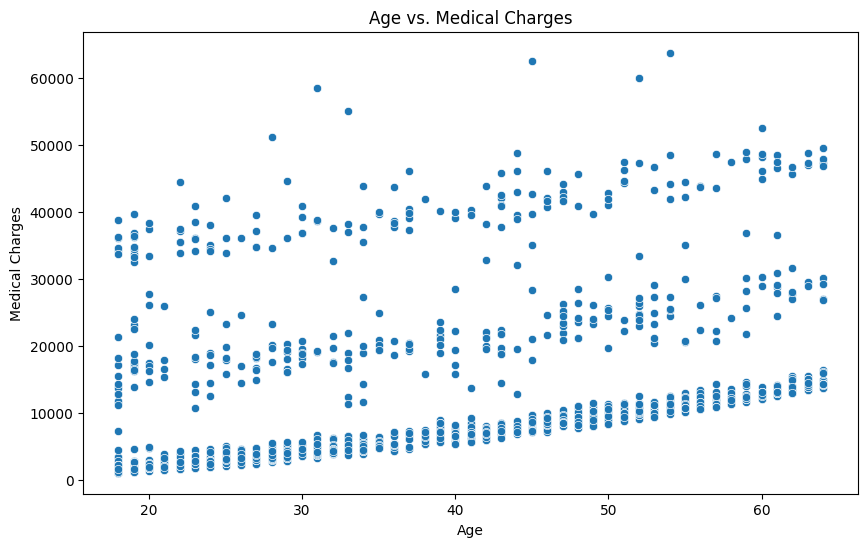

In [3]:
print("Task 1: Age vs. Medical Costs")
age_corr = insurance['age'].corr(insurance['charges'])
print(f"Correlation between age and medical costs: {age_corr:.2f}")

plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=insurance)
plt.title('Age vs. Medical Charges')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.show()

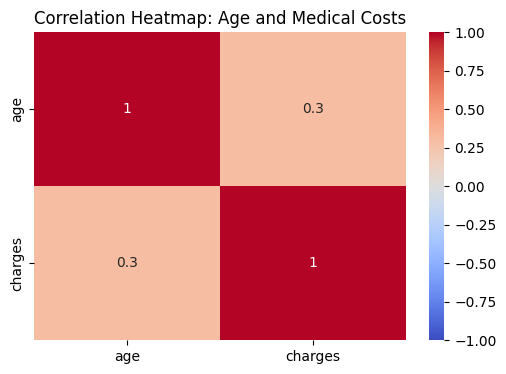

In [4]:
# Heatmap for age vs medical costs
plt.figure(figsize=(6,4))
sns.heatmap(insurance[['age', 'charges']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Age and Medical Costs')
plt.show()

#### **Task 2: How is the number of children related to medical costs?**

Task 2: Number of Children vs. Medical Costs
Correlation between number of children and medical costs: 0.07


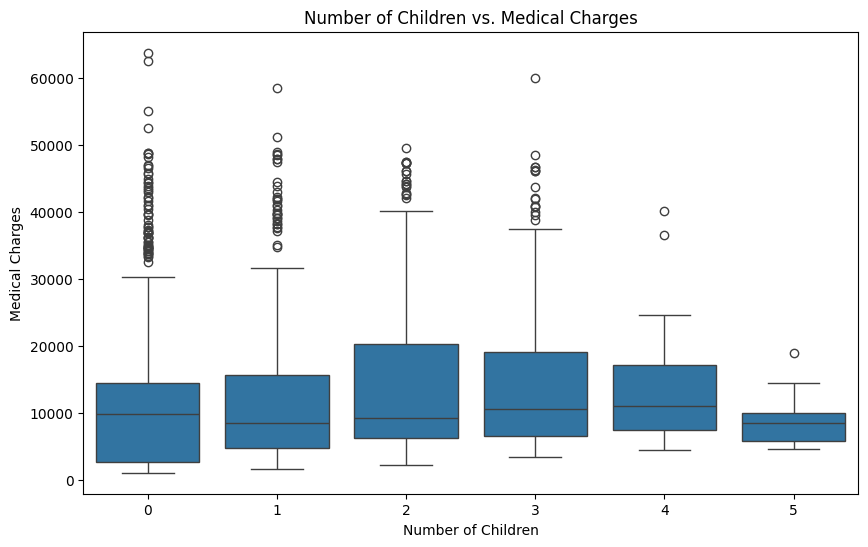

In [5]:
print("Task 2: Number of Children vs. Medical Costs")
children_corr = insurance['children'].corr(insurance['charges'])
print(f"Correlation between number of children and medical costs: {children_corr:.2f}")

plt.figure(figsize=(10,6))
sns.boxplot(x='children', y='charges', data=insurance)
plt.title('Number of Children vs. Medical Charges')
plt.xlabel('Number of Children')
plt.ylabel('Medical Charges')
plt.show()

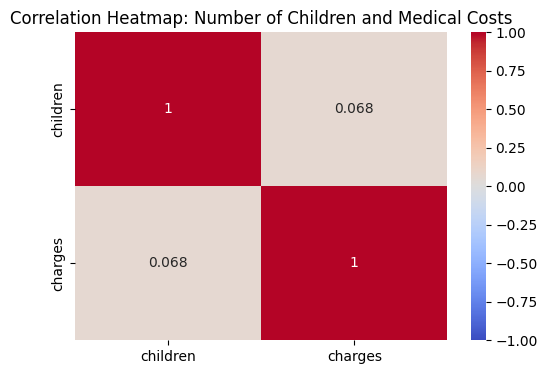

In [6]:
# Heatmap for children vs medical costs
plt.figure(figsize=(6,4))
sns.heatmap(insurance[['children', 'charges']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Number of Children and Medical Costs')
plt.show()

#### **Task 3: How is the number of people distributed by region?**

Task 3: Distribution of People by Region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


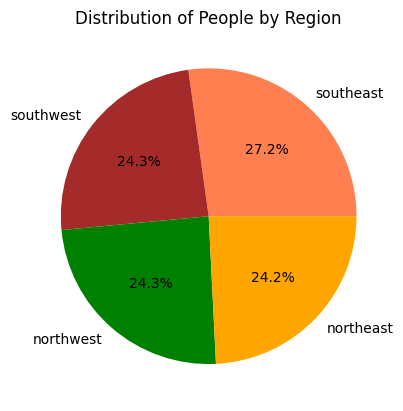

In [7]:

print("Task 3: Distribution of People by Region")
region_distribution = insurance['region'].value_counts()
print(region_distribution)

# Pie chart of people distribution by region
region_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['coral', 'brown', 'green', 'orange'])
plt.title("Distribution of People by Region")
plt.ylabel("")  # Hide y-label for clarity in pie chart
plt.show()

#### **Task 4: How is the number of people distributed by age?**

Task 4: Distribution of People by Age
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


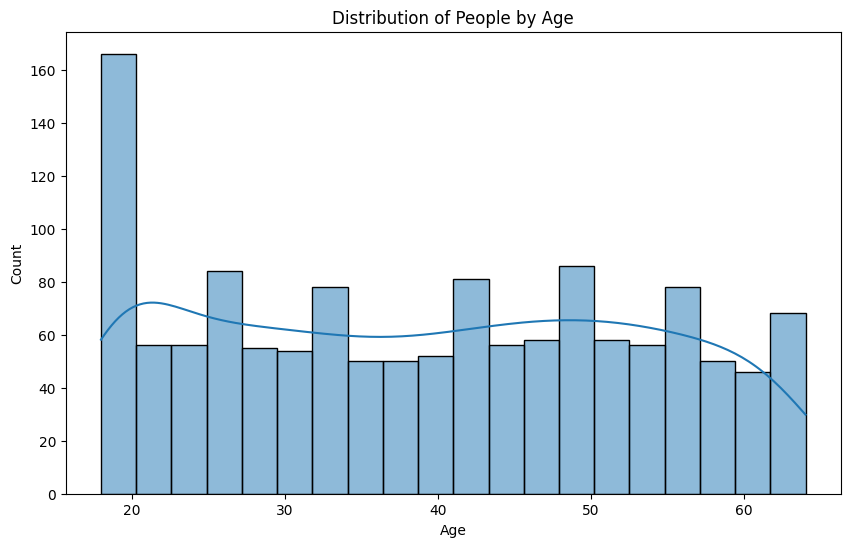

In [8]:
print("Task 4: Distribution of People by Age")
age_distribution = insurance['age'].describe()
print(age_distribution)

plt.figure(figsize=(10,6))
sns.histplot(insurance['age'], bins=20, kde=True)
plt.title('Distribution of People by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#### **Task 5: How are the charges distributed?**

Task 5: Distribution of Medical Charges
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


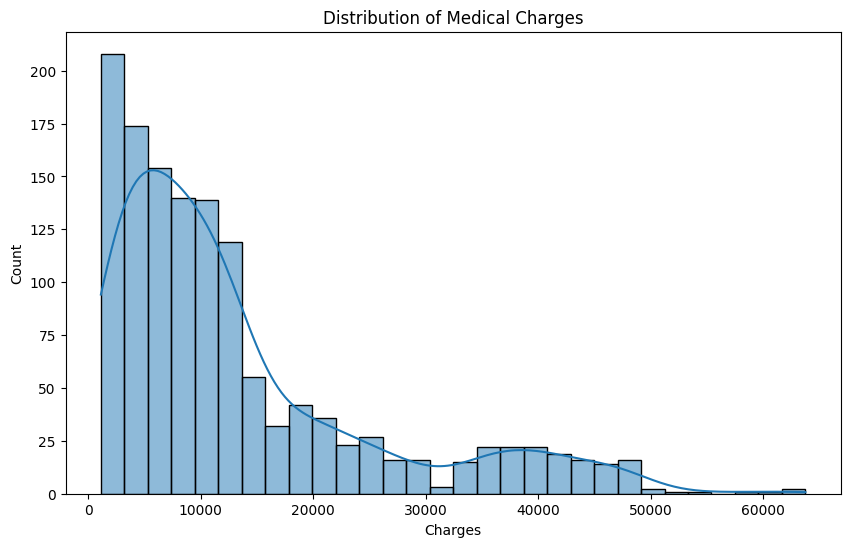

In [9]:
print("Task 5: Distribution of Medical Charges")
charges_distribution = insurance['charges'].describe()
print(charges_distribution)

plt.figure(figsize=(10,6))
sns.histplot(insurance['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

#### **Task 6: Bin the bmi column (based on WHO BMI classification)**

In [10]:
print("Task 6: Binning the BMI Column")
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
insurance['bmi_category'] = pd.cut(insurance['bmi'], bins=bins, labels=labels)
bmi_distribution = insurance['bmi_category'].value_counts()
print(bmi_distribution)

Task 6: Binning the BMI Column
bmi_category
Obese          716
Overweight     380
Normal         221
Underweight     21
Name: count, dtype: int64


### **Task 7: How are the charges related to the bmi?**

Task 7: BMI vs. Medical Costs
Correlation between BMI and medical costs: 0.20


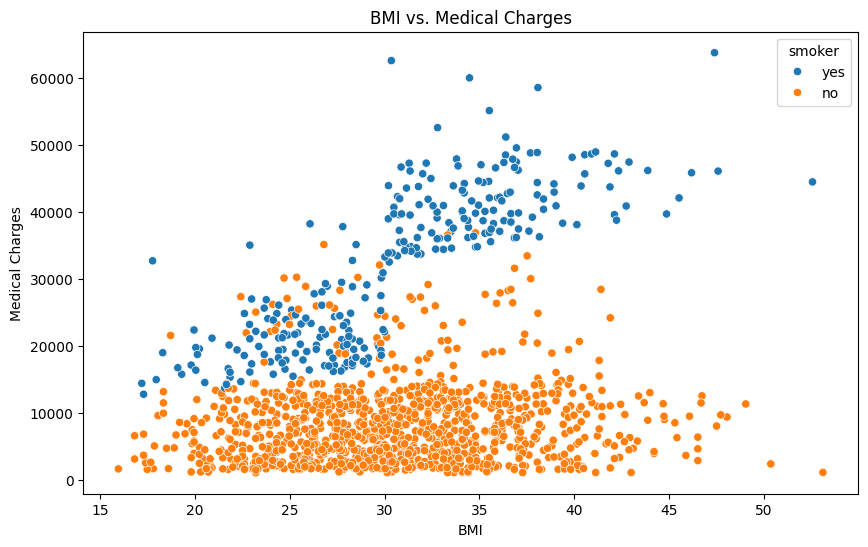

In [11]:
print("Task 7: BMI vs. Medical Costs")
bmi_corr = insurance['bmi'].corr(insurance['charges'])
print(f"Correlation between BMI and medical costs: {bmi_corr:.2f}")

plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data=insurance, hue='smoker')
plt.title('BMI vs. Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Medical Charges')
plt.show()

#### **Task 8: How is smoker status related to charges?**

Task 8: Smoker Status vs. Medical Costs
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


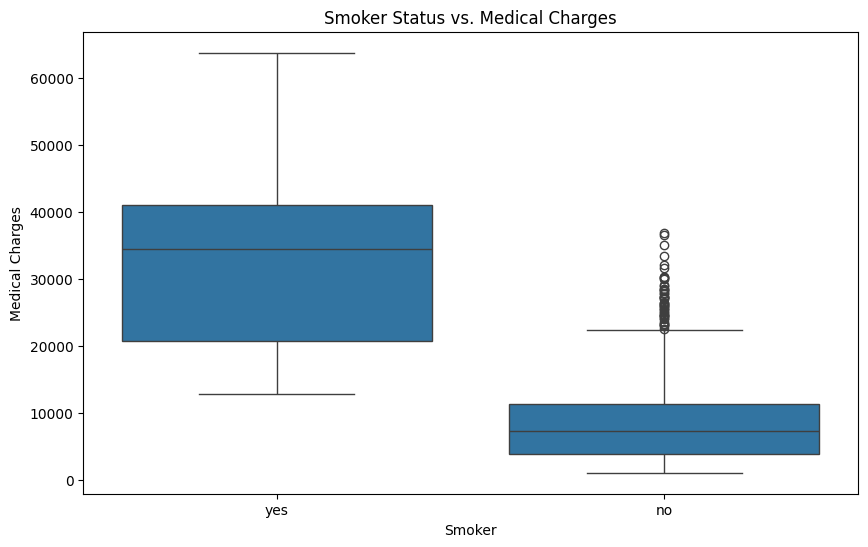

In [12]:
print("Task 8: Smoker Status vs. Medical Costs")
smoker_mean_charges = insurance.groupby('smoker')['charges'].mean()
print(smoker_mean_charges)

plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Smoker Status vs. Medical Charges')
plt.xlabel('Smoker')
plt.ylabel('Medical Charges')
plt.show()

#### **Task 9: How are the charges related to the region?**

Task 9: Region vs. Medical Costs
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


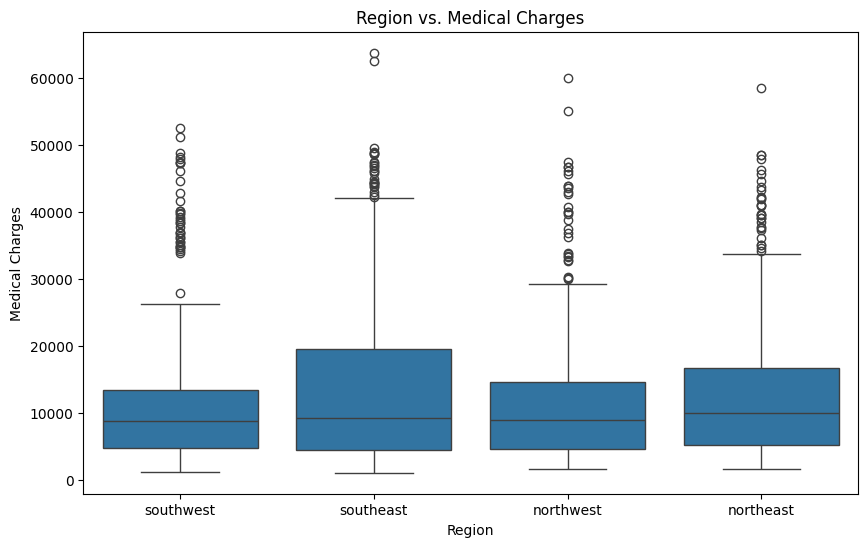

In [13]:
print("Task 9: Region vs. Medical Costs")
region_mean_charges = insurance.groupby('region')['charges'].mean()
print(region_mean_charges)

plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='charges', data=insurance)
plt.title('Region vs. Medical Charges')
plt.xlabel('Region')
plt.ylabel('Medical Charges')
plt.show()

#### **Task 10: Which region has the highest obesity percentage?**

Task 10: Region with the Highest Obesity Percentage
region
northeast    44.444444
northwest    46.153846
southeast    68.406593
southwest    53.230769
dtype: float64


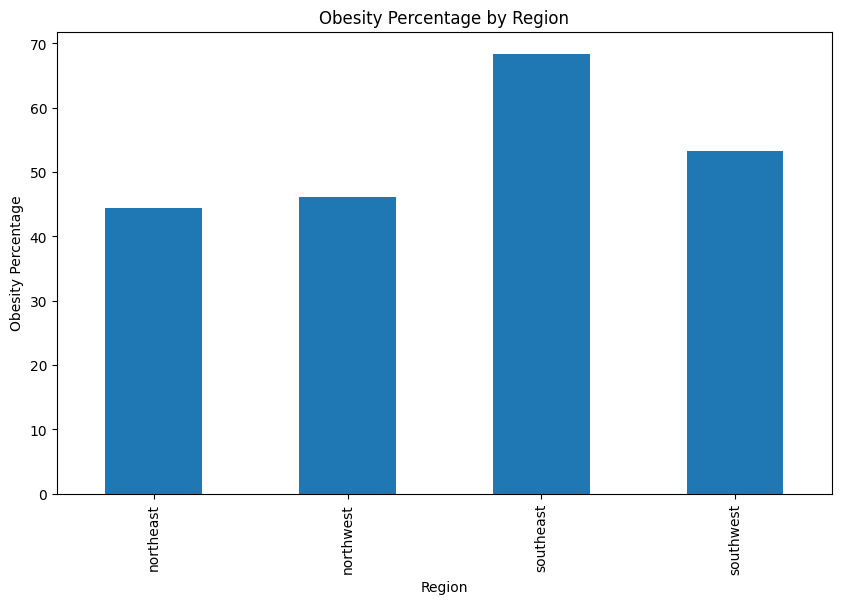

In [14]:
print("Task 10: Region with the Highest Obesity Percentage")
obesity_percentage = insurance[insurance['bmi_category'] == 'Obese'].groupby('region').size() / insurance.groupby('region').size() * 100
print(obesity_percentage)

obesity_percentage.plot(kind='bar', figsize=(10,6))
plt.title('Obesity Percentage by Region')
plt.xlabel('Region')
plt.ylabel('Obesity Percentage')
plt.show()

#### **Task 11: Simple regression (age vs. charges)**

Task 11: Simple Regression - Age vs. Medical Charges


Slope: 257.72, Intercept: 3165.89


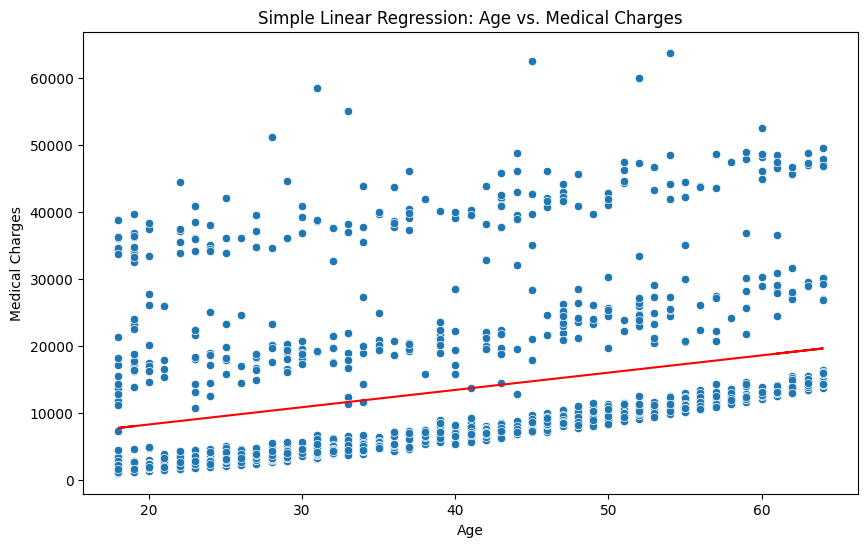

In [15]:
print("Task 11: Simple Regression - Age vs. Medical Charges")
X_age = insurance[['age']]
y_charges = insurance['charges']
reg = LinearRegression()
reg.fit(X_age, y_charges)
age_slope = reg.coef_[0]
age_intercept = reg.intercept_
print(f"Slope: {age_slope:.2f}, Intercept: {age_intercept:.2f}")

plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=insurance)
plt.plot(insurance['age'], reg.predict(X_age), color='red')
plt.title('Simple Linear Regression: Age vs. Medical Charges')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.show()

#### **Task 12: How does the relationship change with smoking status?**

Task 12: Age vs. Charges by Smoking Status


<Figure size 1000x600 with 0 Axes>

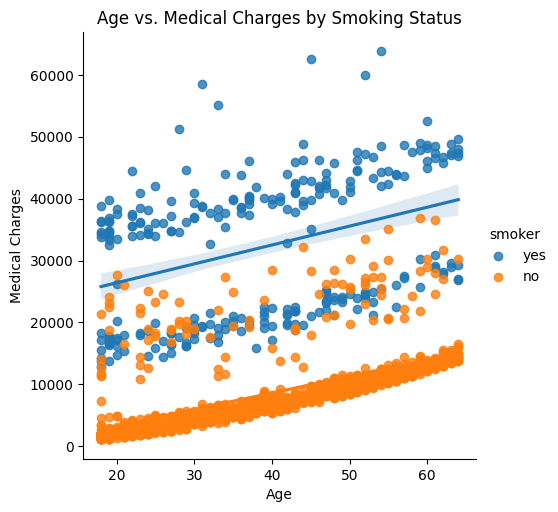

In [16]:
print("Task 12: Age vs. Charges by Smoking Status")
plt.figure(figsize=(10,6))
sns.lmplot(x='age', y='charges', data=insurance, hue='smoker')
plt.title('Age vs. Medical Charges by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.show()

#### **Task 13: How does this relationship change with BMI?**

Task 13: BMI vs. Charges by Smoking Status


<Figure size 1000x600 with 0 Axes>

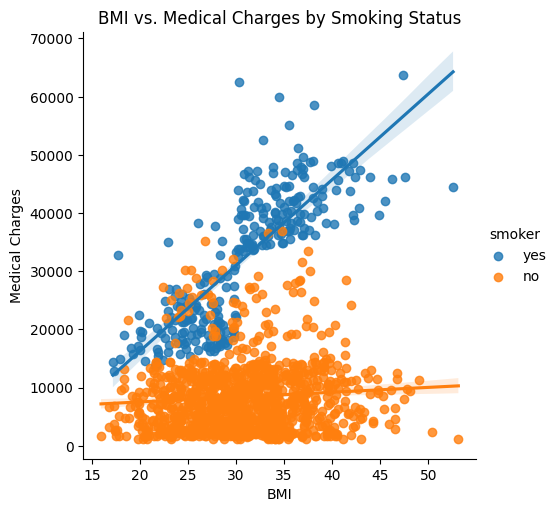

In [17]:
print("Task 13: BMI vs. Charges by Smoking Status")
plt.figure(figsize=(10,6))
sns.lmplot(x='bmi', y='charges', data=insurance, hue='smoker')
plt.title('BMI vs. Medical Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Medical Charges')
plt.show()

#### **Task 14: Multiple regression model to predict charges**

In [18]:
print("Task 14: Multiple Regression to Predict Charges")
# Encode categorical columns (dummy encoding)
insurance_encoded = pd.get_dummies(insurance, drop_first=True)

# Features and target variable
X = insurance_encoded.drop('charges', axis=1)
y = insurance_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the multiple linear regression model
multiple_reg = LinearRegression()
multiple_reg.fit(X_train_scaled, y_train)

Task 14: Multiple Regression to Predict Charges


LinearRegression()

#### **Task 15: Make predictions with the multiple regression model and evaluate performance**

In [19]:
print("Task 15: Model Predictions and Evaluation")
y_pred = multiple_reg.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Task 15: Model Predictions and Evaluation
Mean Squared Error: 34212170.56
R-squared: 0.78


#### **Task 16: Optimal number of parameters**

Task 16: Correlation Heatmap to Check Relationships


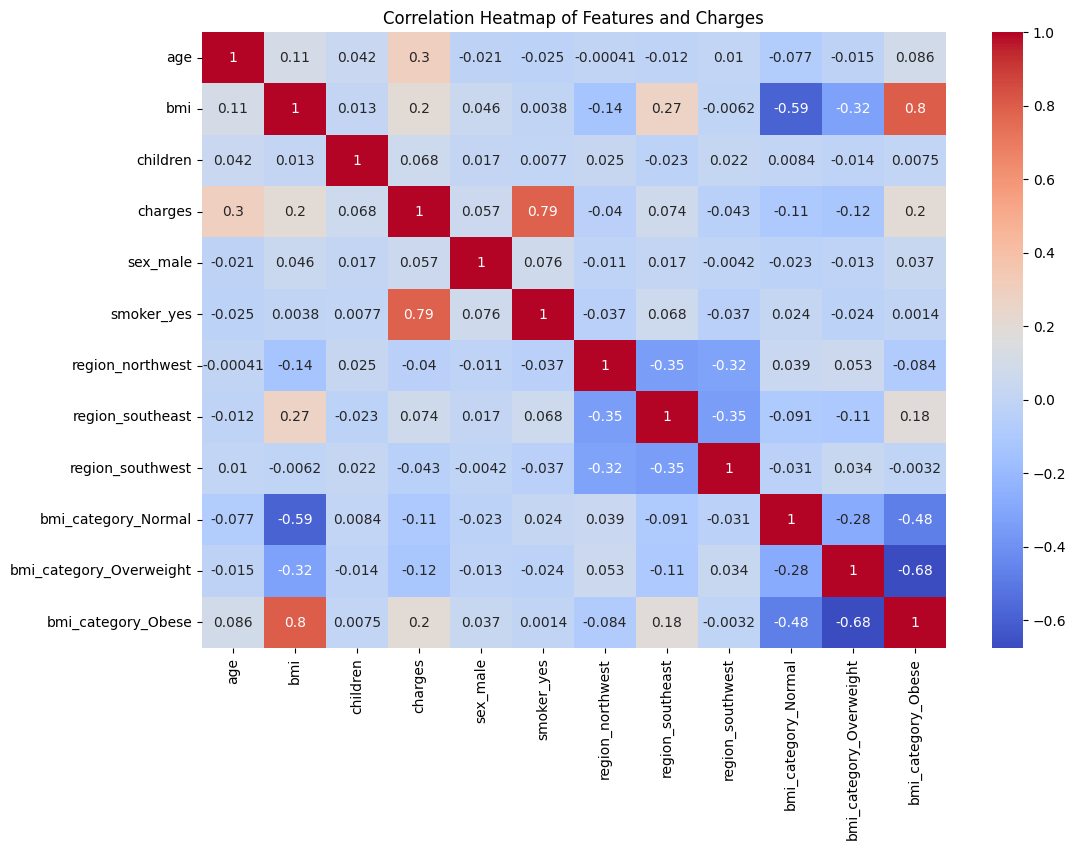

In [20]:
print("Task 16: Correlation Heatmap to Check Relationships")
correlation_matrix = insurance_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features and Charges')
plt.show()